In [1]:
from scipy.io import loadmat
from scipy.io import savemat
import matplotlib.pyplot as plt
import numpy as np

import nibabel as nib
from skimage.transform import resize
from sklearn.preprocessing import minmax_scale

import h5py

In [2]:
from sklearn.preprocessing import minmax_scale

-1.0 4094.0
(256, 256, 24)
0.0 1.0


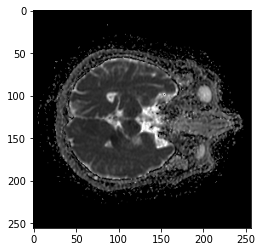

In [4]:
img = nib.load("ADC.nii.gz").get_fdata()
print(np.min(img), np.max(img))
print(img.shape)

img = minmax_scale(img.ravel(), feature_range=(0,1)).reshape(img.shape)
print(np.min(img), np.max(img))

plt.imshow(img[:,:,10], cmap="gray")
plt.show()

img = img[:,:,7:14]

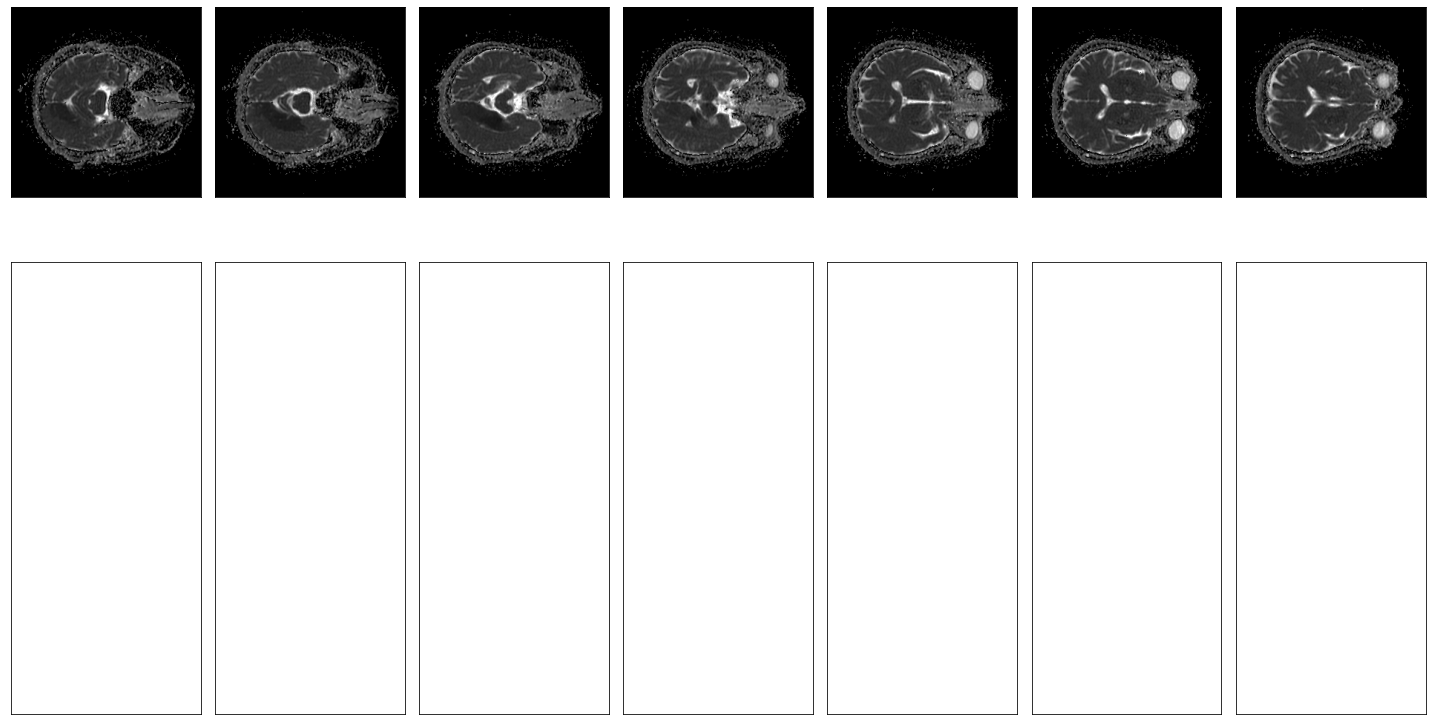

In [5]:
methods = np.arange(7).tolist()

# Fixing random state for reproducibility
# np.random.seed(19680801)

#grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20,12),
                        subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(img[:,:,i], cmap='gray')
    #ax.set_title(str(interp_method))
    i+=1

plt.tight_layout()
plt.show()

In [6]:
img = np.transpose(img, axes=[2, 0, 1])
print(img.shape)
mynewfile = h5py.File('data_train_ADC.mat', 'w')
mynewfile.create_dataset('data_fs', data=img)
mynewfile.close()

(7, 256, 256)


<br><br><br><br>

In [7]:
def window_image(image, window_center=60, window_width=120):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    return window_image

(256, 256, 24)
0.0 1.0


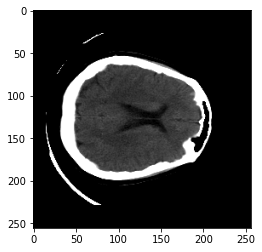

(256, 256, 7)


In [8]:
img = nib.load("CT_registered.nii.gz").get_fdata()
img = window_image(img)
print(img.shape)

img = minmax_scale(img.ravel(), feature_range=(0,1)).reshape(img.shape)
print(np.min(img), np.max(img))

img = resize(img[:,:,:], (256,256))

plt.imshow(img[:,:,15], cmap="gray")
plt.show()

img = img[:,:,8:15]
print(img.shape)

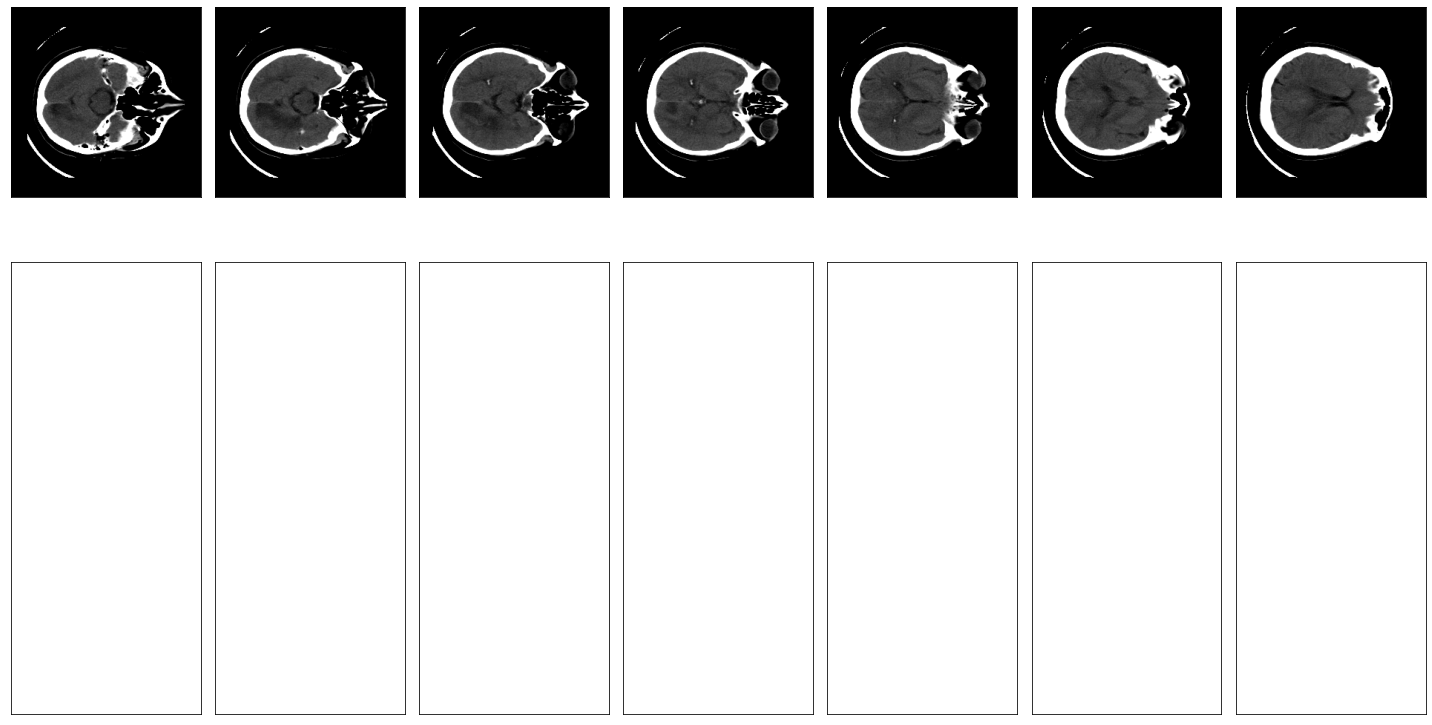

In [9]:
methods = np.arange(7).tolist()

# Fixing random state for reproducibility
# np.random.seed(19680801)

#grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20,12),
                        subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(img[:,:,i], cmap='gray')
    #ax.set_title(str(interp_method))
    i+=1

plt.tight_layout()
plt.show()

In [10]:
img = np.transpose(img, axes=[2, 0, 1])
print(img.shape)
mynewfile = h5py.File('data_train_NCCT.mat', 'w')
mynewfile.create_dataset('data_fs', data=img)
mynewfile.close()

(7, 256, 256)
